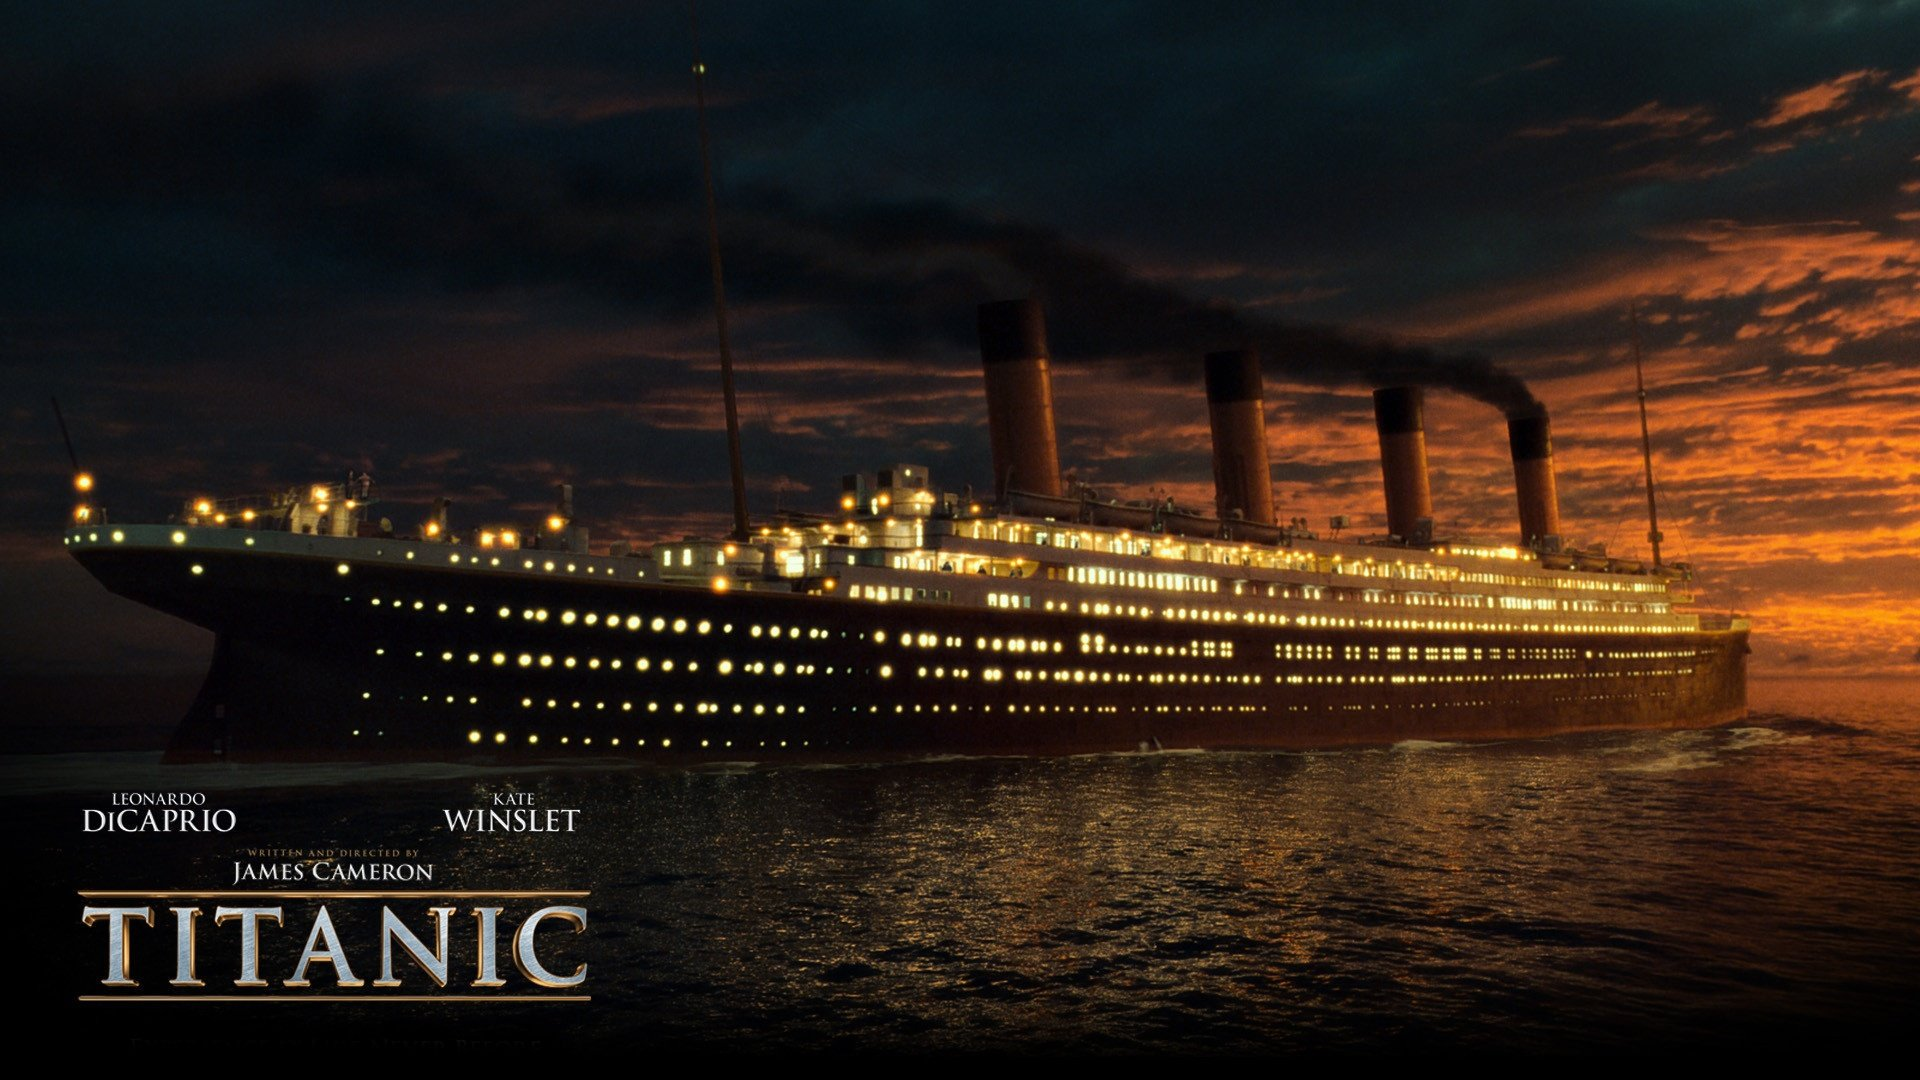

**About the Project**

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

**Aim of the project is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.**

**Import Libraries**

In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Load the dataset

train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test (1).csv')

In [3]:
df = [train, test]


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Exploratory Data Analysis**

Let's begin some exploratory data analysis!We'll start by checking out missing data.

In [7]:
train.info()
print("-"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



*   Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

*   Around 38% samples survived representative of the actual survival rate at 32%.

*   Most passengers (> 75%) did not travel with parents or children.
*   Nearly 30% of the passengers had siblings and/or spouse aboard.


*   Fares varied significantly with few passengers (<1%) paying as high as $512.


*   75% passengers were less than 38 years.





In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644



*   Names are unique across the dataset.

*   65% passengers were Male.
*   Embarked column takes 3 values. 644 passengers embarked from Southampton(S).


*   Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Ticket feature has high ratio (22%) of duplicate values (unique=681).


**Missing Data**

In [10]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


*  Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
*  Cabin > Age are incomplete in case of test dataset.



We can use seaborn to create a simple heatmap to see where we have missing data.

<Axes: >

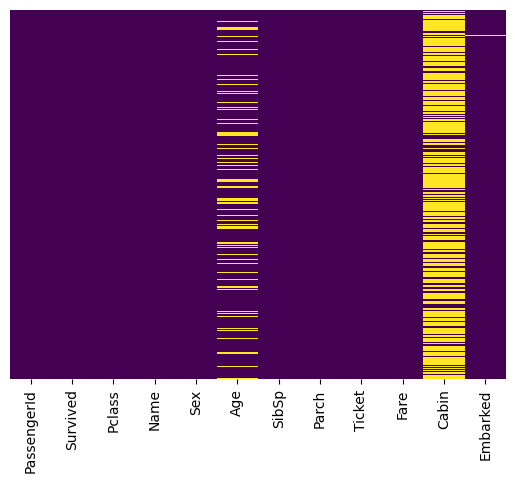

In [12]:
sns.heatmap(train.isnull(),yticklabels = False,cbar=False,cmap='viridis')

Age and Cabin column has the most NaN values. Also Embarked column has 2 null values. Roughly 20% of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful. We will probably drop this later.


**Analyze by Pivoting Features**

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

In [13]:
train[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We observe significant correlation (>0.5) among Pclass=1 and Survived.

In [14]:
train[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Sex=female had very high survival rate at 74%.

In [15]:
train[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


SibSp and Parch features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features.

**Analyze by Visualizing Data**

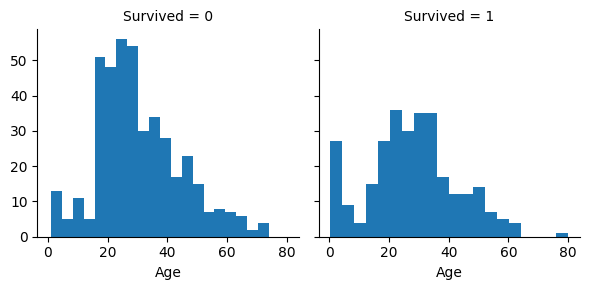

In [17]:
g = sns.FacetGrid(data=train, col="Survived")
g.map(plt.hist, 'Age', bins=20)

* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

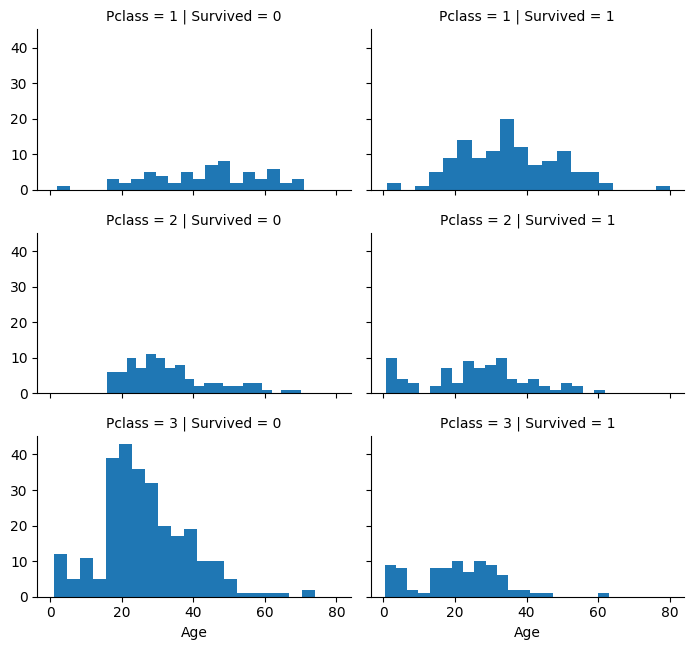

In [18]:
g = sns.FacetGrid(data=train, col ="Survived", row="Pclass", height=2.2,aspect=1.6)
g.map(plt.hist, "Age",bins=20)

* Pclass=3 had most passengers, however most did not survive.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived.
* Most passengers in Pclass=1 survived.
* Pclass varies in terms of Age distribution of passengers.

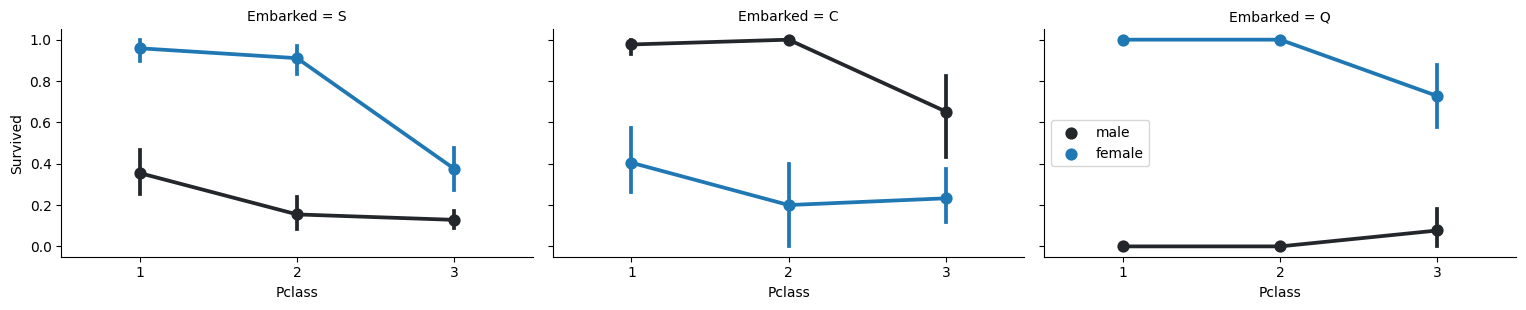

In [19]:
#C = Cherbourg, Q = Queenstown, S = Southampton

p = sns.FacetGrid(data=train, col = "Embarked", height=3.2, aspect=1.6)
p.map(sns.pointplot, "Pclass","Survived","Sex")
plt.legend()

* Female passengers had much better survival rate than males.
* Exception in Embarked=C where males had higher survival rate. There could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

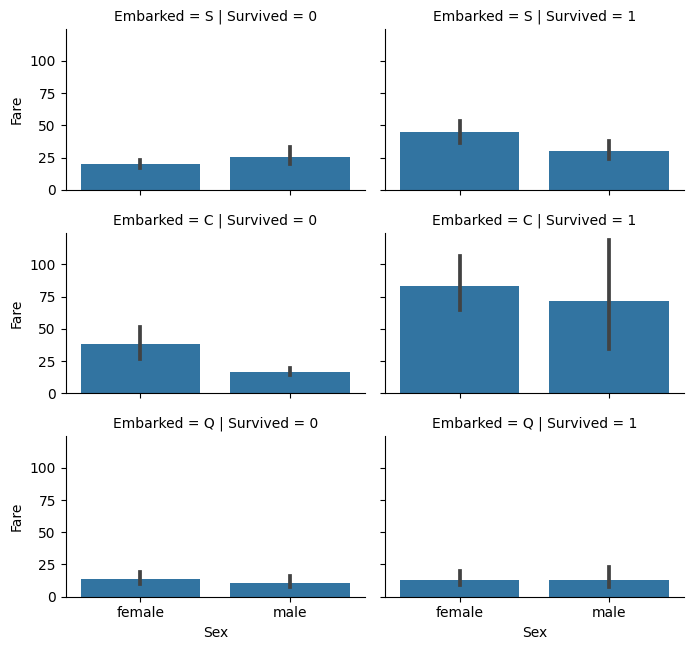

In [20]:
f = sns.FacetGrid(train, row="Embarked",col ="Survived",height=2.2,aspect=1.6)
f.map(sns.barplot, "Sex","Fare")


* Higher fare paying passengers had better survival.
* Port of embarkation correlates with survival rates.

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Dropping the Features**

In [22]:
print("Before", train.shape, test.shape, df[0].shape, df[1].shape)

test.drop(["Cabin","Ticket","PassengerId"],axis=1,inplace=True)
train.drop(["Cabin","Ticket","PassengerId"],axis=1,inplace=True)

print("After", train.shape, test.shape, df[0].shape, df[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 9) (418, 8) (891, 9) (418, 8)


**Feature Extraction from existing Name column**

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name feature.

Let us extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

In [23]:
for dataset in df:
  dataset["Title"] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [24]:
pd.crosstab(train["Title"],train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

We can replace many titles with a more common name or classify them as Rare.

In [26]:
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [27]:
for dataset in df:
  dataset["Title"] = dataset["Title"].replace(['Don', 'Rev', 'Dr',
   'Major', 'Lady', 'Sir', 'Col', 'Capt',
       'Countess', 'Jonkheer','Dona'],'Rare')
  dataset["Title"] = dataset["Title"].replace('Mlle',"Miss")
  dataset["Title"] = dataset["Title"].replace('Ms','Miss')
  dataset['Title'] = dataset['Title'].replace('Mme','Mrs')


In [28]:
train[["Title",'Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [29]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [30]:
mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

for dataset in df:
  dataset["Title"]= dataset["Title"].map(mapping)
  dataset["Title"] = dataset["Title"].fillna(0)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [31]:
train["Title"].unique()

array([1, 3, 2, 4, 5])

Drop the Name feature.

In [32]:
train.drop("Name",axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

df = [train,test]
train.shape,test.shape

((891, 9), (418, 8))

In [33]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   Title     418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [35]:
test["Fare"].fillna(test["Fare"].dropna().median(),inplace=True)

test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
Title        0
dtype: int64

In [36]:
train["Embarked"].fillna(train["Embarked"].dropna().mode()[0],inplace=True)

train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

There is correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

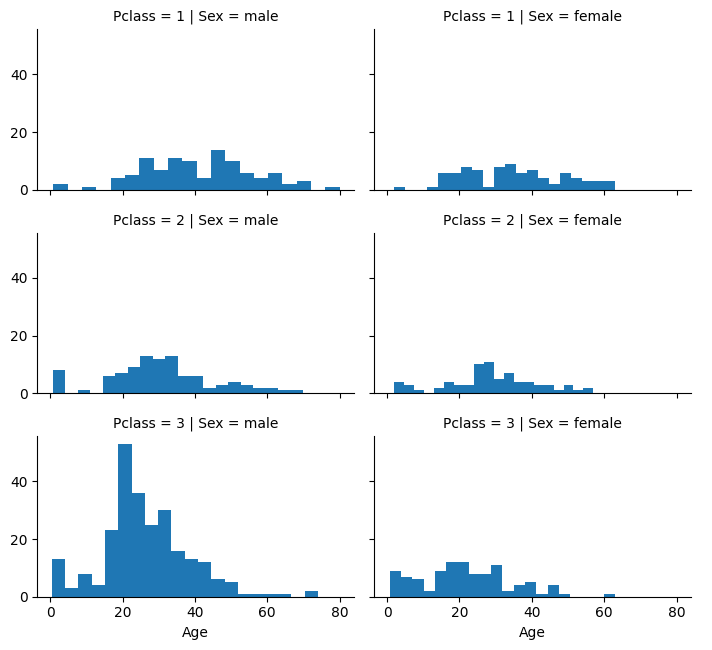

In [37]:
g = sns.FacetGrid(train, row="Pclass",col ="Sex",height=2.2,aspect=1.6)
g.map(plt.hist, 'Age', bins=20)
g.add_legend()


In [38]:
for dataset in df:
  dataset["Sex"] = dataset["Sex"].map({"male":0,"female":1}).astype(int)
  dataset["Embarked"] = dataset["Embarked"].map({"S":0,"C":1,"Q":2}).astype(int)

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [39]:
guess_age = np.zeros((2,3))
guess_age

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [40]:
for dataset in df:
  for i in range(0,2):
    for j in range(0,3):
      guess_df = dataset[(dataset["Sex"]==i) & (dataset["Pclass"]==j+1)]["Age"].dropna()

      age_guess = guess_df.median()

      # Convert random age float to nearest .5 age
      guess_age[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
  for i in range(0,2):
    for j in range(0,3):
      dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i) & (dataset.Pclass==j+1), "Age"] = guess_age[i,j]
  dataset["Age"] = dataset["Age"].astype(int)

train.head()




,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,0,1
1,1,1,1,38,1,0,71.2833,1,3
2,1,3,1,26,0,0,7.9250,0,2
3,1,1,1,35,1,0,53.1000,0,3
4,0,3,0,35,0,0,8.0500,0,1


In [41]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

Let us create Age bands and determine correlations with Survived.

In [42]:
train["Ageband"] = pd.cut(train["Age"],5)
train[["Ageband","Survived"]].groupby("Ageband",as_index=False).mean().sort_values(by="Ageband",ascending=True)

,Ageband,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [43]:
for dataset in df:
  dataset.loc[dataset["Age"]<=16, 'Age'] = 0
  dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32), 'Age']=1
  dataset.loc[(dataset['Age']>32) & (dataset["Age"]<=48), 'Age']=2
  dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64), 'Age']=3
  dataset.loc[(dataset["Age"]>64) & (dataset['Age']<=80), 'Age']=4

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ageband
0,0,3,0,1,1,0,7.2500,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,1,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,0,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,0,1,"(32.0, 48.0]"


In [44]:
train.drop('Ageband',axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1


We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [45]:
for dataset in df:
  dataset["FamilySize"] = dataset["Parch"]+dataset["SibSp"]+1

train[["FamilySize","Survived"]].groupby('FamilySize',as_index=False).mean().sort_values(by="Survived",ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Let us create another feature called IsAlone.

In [46]:
for dataset in df:
  dataset["IsAlone"] = 0
  dataset.loc[dataset["FamilySize"]==1, "IsAlone"] = 1


train[["IsAlone","Survived"]].groupby("IsAlone").mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [47]:
train.drop(["Parch","SibSp","FamilySize"],axis=1,inplace=True)
test.drop(["Parch","SibSp","FamilySize"],axis=1,inplace=True)

train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1,13.0000,0,5,1
887,1,1,1,1,30.0000,0,2,1
888,0,3,1,1,23.4500,0,2,0
889,1,1,0,1,30.0000,1,1,1


Let us create a Fare band also.

In [48]:
train["FareBand"] = pd.qcut(train["Fare"],4)

train[["FareBand","Survived"]].groupby("FareBand",as_index=False).mean().sort_values(by="FareBand")

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [49]:
for dataset in df:
  dataset.loc[dataset["Fare"]<=7.91,"Fare"] = 0
  dataset.loc[(dataset["Fare"]>7.91) & (dataset["Fare"]<=14.454),"Fare"] =1
  dataset.loc[(dataset["Fare"]>14.454) & (dataset["Fare"]<=31.0),"Fare"] =2
  dataset.loc[(dataset["Fare"]>31.0) & (dataset["Fare"]<=512.329),"Fare"] =3

  dataset["Fare"] = dataset["Fare"].astype(int)

train.drop('FareBand',axis=1,inplace=True)
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5,1
887,1,1,1,1,2,0,2,1
888,0,3,1,1,2,0,2,0
889,1,1,0,1,2,1,1,1


In [50]:
test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,2,0,2,1,1
1,3,1,2,0,0,3,0
2,2,0,3,1,2,1,1
3,3,0,1,1,0,1,1
4,3,1,1,1,0,3,0
...,...,...,...,...,...,...,...
413,3,0,1,1,0,1,1
414,1,1,2,3,1,5,1
415,3,0,2,0,0,1,1
416,3,0,1,1,0,1,1


### **Model Development**

In [51]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [52]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(test)
print("Confidence Score:",round(lr.score(X_train,y_train)*100,2))

Confidence Score: 81.26


In [53]:
sv = SVC(kernel="linear")
sv.fit(X_train,y_train)
y_pred = sv.predict(test)
print("Confidence Score:",round(sv.score(X_train,y_train)*100,2))

Confidence Score: 78.9


In [54]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(test)
print("Confidence Score:",round(knn.score(X_train,y_train)*100,2))

Confidence Score: 84.29


In [55]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(test)
print("Confidence Score:",round(nb.score(X_train,y_train)*100,2))

Confidence Score: 73.85


In [56]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)
y_pred = dt.predict(test)
print("Confidence Score:",round(dt.score(X_train,y_train)*100,2))

Confidence Score: 86.76


In [57]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
y_pred = rf.predict(test)
print("Confidence Score:",round(rf.score(X_train,y_train)*100,2))

Confidence Score: 86.76


### **Saving the Model**

In [61]:
import pickle

In [62]:
with open('titanic_model','wb') as f:
  pickle.dump(rf,f)

In [63]:
with open('titanic_model','rb') as f:
  model = pickle.load(f)


### **Prediction**

In [66]:
pred = model.predict([[3,0,1,0,0,1,0]])

if pred==0:
  print("Did Not Survive")
else:
  print("Survived")

Did Not Survive
